<a href="https://colab.research.google.com/github/ChaviPalma/Counter-strike-machine-learning/blob/main/Support_Vector_Machine_Counter_Strike_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Modelo Support Vector Machine de la target RoundWinner



Integrantes:

*   Gonzalo Gallardo
*   Bárbara Palma Mena

Docente: Giocrisrai Godoy

Sección: MLY0100 - 002D


## Importar librerias


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error


In [2]:
#Montar drive en el Notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Llamar archivo desde el drive
file_path = "/content/drive/MyDrive/Machine Learning- Counter Strike/csgo_datos_limpios.csv"
csgo = pd.read_csv(file_path, sep=",")

<ipython-input-3-2661877808>:3: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  csgo = pd.read_csv(file_path, sep=",")


##Análisis estadístico básico




In [4]:
csgo.head()

,Map,Team,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,...,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,TotalGrenades,RoundDeaths,KDR
0,de_inferno,Terrorist,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,...,0,750,4400,0,0,0,0,4,1,0.0
1,de_inferno,Terrorist,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,...,0,800,4400,0,0,0,0,0,1,0.0
2,de_inferno,Terrorist,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,...,0,1000,4400,0,0,0,0,0,1,0.0
3,de_inferno,Terrorist,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,...,0,850,4400,0,0,0,0,0,1,0.0
4,de_inferno,Terrorist,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,...,0,1000,4400,0,0,0,0,2,0,0.0


In [5]:
csgo.columns.tolist()

['Map',
 'Team',
 'RoundId',
 'RoundWinner',
 'MatchWinner',
 'Survived',
 'AbnormalMatch',
 'TimeAlive',
 'TravelledDistance',
 'RLethalGrenadesThrown',
 'RNonLethalGrenadesThrown',
 'PrimaryAssaultRifle',
 'PrimarySniperRifle',
 'PrimaryHeavy',
 'PrimarySMG',
 'PrimaryPistol',
 'FirstKillTime',
 'RoundKills',
 'RoundAssists',
 'RoundHeadshots',
 'RoundFlankKills',
 'RoundStartingEquipmentValue',
 'TeamStartingEquipmentValue',
 'MatchKills',
 'MatchFlankKills',
 'MatchAssists',
 'MatchHeadshots',
 'TotalGrenades',
 'RoundDeaths',
 'KDR']

In [6]:
csgo.describe().T

,count,mean,std,min,25%,50%,75%,max
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0
PrimaryPistol,79157.0,0.221787,0.415451,0.0,0.0,0.0,0.0,1.0
RoundKills,79157.0,0.671349,0.881798,0.0,0.0,0.0,1.0,5.0
RoundAssists,79157.0,0.146178,0.385601,0.0,0.0,0.0,0.0,4.0


## Selección de Target y predictor

In [11]:
# Definimos el target o variable objetivo
target = 'RoundWinner'

# Definimos las variables predictoras
features = [
    'RoundKills',
    'RoundDeaths',
    'KDR',
    'TeamStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'Map',
    'Team'
]

# Filtramos el DataFrame para quedarnos solo con filas donde 'RoundWinner' tenga valores válidos ('True' o 'False')
csgo = csgo[csgo['RoundWinner'].isin(['True', 'False'])]

# Creamos X con las variables predictoras y aplicamos one-hot encoding a las categóricas
X = csgo[features]
X = pd.get_dummies(X, columns=['Map', 'Team'])

# Creamos el vector objetivo y
y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)

# Mostramos muestra para verificar
print(X.head())
print(y.head())


   RoundKills  RoundDeaths  KDR  TeamStartingEquipmentValue  \
0           0            1  0.0                        4400   
1           0            1  0.0                        4400   
2           0            1  0.0                        4400   
3           0            1  0.0                        4400   
4           0            0  0.0                        4400   

   RLethalGrenadesThrown  RNonLethalGrenadesThrown  Map_de_dust2  \
0                      0                         4         False   
1                      0                         0         False   
2                      0                         0         False   
3                      0                         0         False   
4                      1                         1         False   

   Map_de_inferno  Map_de_mirage  Map_de_nuke  Team_CounterTerrorist  \
0            True          False        False                  False   
1            True          False        False                  False

<ipython-input-11-3550009046>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = csgo[target].replace({'True': 1, 'False': 0}).astype(int)


## Dividiendo el csv para entrenamiento y pruebas

In [12]:
#Con test_size se divide 20% para pruebas y 80% entrenamiento
#Random_state garantiza que la partición sea la misma cada vez que se ejecute el notebook si se usa el mismo número en este caso 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Crear el modelo SVM para clasificación con kernel RBF
svm_model = SVC(kernel='rbf', C=100, gamma=0.1)

# Entrenar el modelo con los datos escalados
svm_model.fit(X_train_scaled, y_train)


SVC(C=100, gamma=0.1)

##Evaluación del modelo

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Generar las predicciones del modelo SVM usando el conjunto de prueba
y_pred = svm_model.predict(X_test_scaled)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir métricas en formato similar al de regresión
print(f"Accuracy : {accuracy:.2f}")     # Precisión general del modelo
print(f"Precision: {precision:.2f}")    # Exactitud de los positivos
print(f"Recall   : {recall:.2f}")       # Cobertura de los positivos
print(f"F1 Score : {f1:.2f}")           # Balance entre precisión y recall


Accuracy : 0.71
Precision: 0.70
Recall   : 0.76
F1 Score : 0.73


**Métricas**

Accuracy (0.71): El modelo acierta en un 71% de los casos al predecir si el equipo ganará una ronda, lo cual dice que el desempeño en general es aceptable.

Precision (0.70): Dice que de todas las rondas que el modelo predijo como ganadas solo el 70% fueron correctas. Lo cual demuestra que tiene una buena tasa de aciertos al reconocer las rondas ganadoras, aunque existe un margen de mejora.

Recall (0.76): El modelo está detectando correctamente el 76% de las rondas que realmente se ganaron, lo cual significa que tiene un alta sensibilidad para identificar casos positivos,

F1 Score (0.73): La combinación que se obtuvo entre la precisión y el recall indica que tiene un equilibrio sólido, con un F1 Score de 0.73 que refleja un rendimiento estable y confiable para este tipo de tareas.



## Visualización del modelo


**Matriz de confusión**



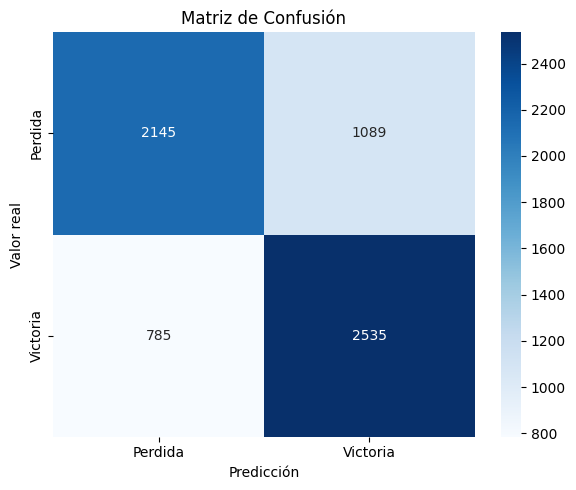

In [22]:

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con etiquetas
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Perdida', 'Victoria'], yticklabels=['Perdida', 'Victoria'])
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()


**Curva ROC + AUC**

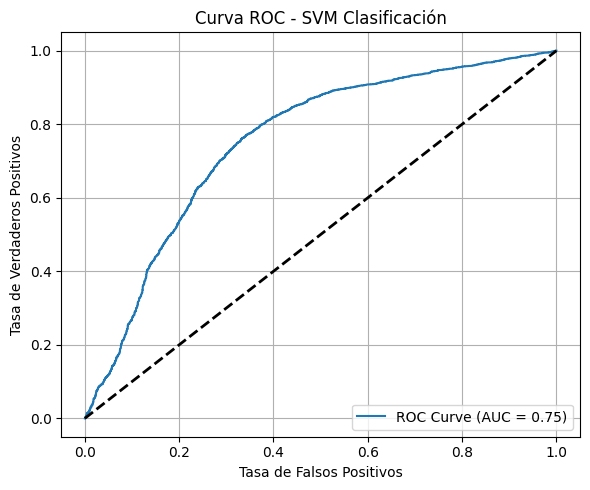

In [24]:
# Asegúrate de tener las probabilidades si estás usando un modelo que soporta `decision_function` o `predict_proba`
y_scores = svm_model.decision_function(X_test_scaled)  # Usa esto si es un SVM con kernel lineal o RBF

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - SVM Clasificación')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reporte de Clasificación**

In [27]:
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Perdida', 'Victoria']))

Reporte de Clasificación:
              precision    recall  f1-score   support

     Perdida       0.73      0.66      0.70      3234
    Victoria       0.70      0.76      0.73      3320

    accuracy                           0.71      6554
   macro avg       0.72      0.71      0.71      6554
weighted avg       0.72      0.71      0.71      6554



**Distribución de Probabilidades**

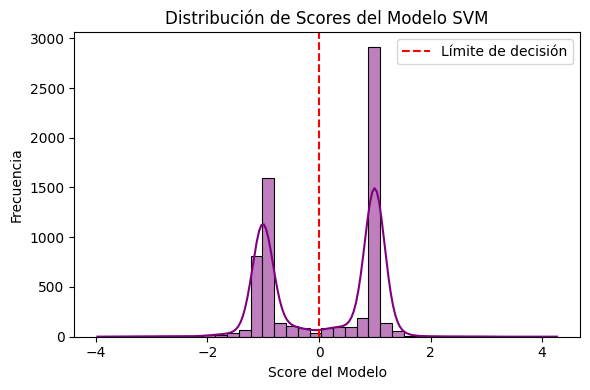

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(y_scores, kde=True, color='purple')
plt.title("Distribución de Scores del Modelo SVM")
plt.xlabel("Score del Modelo")
plt.ylabel("Frecuencia")
plt.axvline(0, color='red', linestyle='--', label='Límite de decisión')
plt.legend()
plt.tight_layout()
plt.show()

**Análisis visual**



*  El modelo predice con mayor facilidad las victorias que las derrotas.
*   El AUC de 0.75 demuestra que tiene una buena capacidad de separación entre clases.
*   La zona de decisión contiene ejemplos ambiguos, lo que se sugiere afinar el margen.
*   El desempeño del modelo es aceptable ya que tiene un accuracy de 71% y F1 Score de 0.71 aprox. Lo cual indica que tiene potencial de mejora sobre todo en la detección de derrotas



